## Decision Tree Classifier
##### For predicting number of Observation Sequences
Decision Trees are supervised learning algorithms that make predictions by recursively splitting data into decision nodes based on feature values. It can handle both numerical data, making it perfect for predicting observation sequences needed for a group. 

To model a shuttlecock's trajectory for an observation group in a 3D space, one of the prerequisites is to obtain the total number of observation seqeunces needed for each observation group. This is predicted using a Decision Tree Classifier, to classify and predict these sequences, based on initial features such as the human player's initial position and shuttlecock's initial characteristics. 
### Dependencies for Decision Tree Classifier

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import os

# data mining and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import learning_curve
import joblib

# visualization
import matplotlib.pyplot as plt

### Prepare data for Decision Tree Classifer
The decision tree is to be trained using inputs such as the human player's positions (X, Y, Z), shuttlecock's initial velocity, firing angle, slant angle to sideline. It will then be used to predict the number of observation sequences needed. Thus, for each observation group, only the last record of each observation group is retained, to allow the model to learn from steps at the end of the sequence instead of steps in the middle of the sequence. 

In [7]:
data = pd.read_csv('../../data/cleaned/normal_data.csv')
# Drop all rows except last observation sequence, of each observation group
data = data.drop_duplicates(subset='OBSERVATION GROUP NUMBER', keep='last')
# Define X features
x_feature = data[['HUMAN PLAYER POSITION(X) metres', 
    'HUMAN PLAYER POSITION(Y) metres', 
    'HUMAN PLAYER POSITION(Z) metres', 
    'INITIAL VELOCITY OF SHUTTLECOCK(m/s)', 
    'INITIAL SHUTTLECOCK FIRING ANGLE(DEGREE)', 
    'INITIAL SHUTTLECOCK SLANT ANGLE TO SIDELINE(DEGREE)']]
# Define Y feature
y_feature = data['OBSERVATION NUMBER']
# Train-Test splits
x_train, x_test, y_train, y_test = train_test_split(x_feature, y_feature, test_size=0.2, random_state=42)

### Optimal Depth for Decision Tree Classifier
The depth of a decision tree defines how many times the data can be split before reaching a leaf node. To find the optimal depth for the Decision Tree, multiple models are trained at different depths, and accuracy scores are recorded for both training and test sets. This ensures the best balance between performance and generalization.

In [8]:
# Define range of maximum depths to evaluate
max_depths = [2,3,4,5,6,7,8,9,10,15] 
# Initialize arrays to store train-test accuracies
train_acc = np.zeros(len(max_depths))
test_acc = np.zeros(len(max_depths))
# Iterate over different depth values
for index, depth in enumerate(max_depths):
    # Train a Decision Tree Classifier with the current max depth, using x and y training sets
    temp_model = DecisionTreeClassifier(max_depth=depth)
    temp_model.fit(x_train, y_train)
    # Generate predictions on both training and test sets
    y_pred_train = temp_model.predict(x_train)
    y_pred_test = temp_model.predict(x_test)
    # Compute accuracy scores and store them
    train_acc[index] = accuracy_score(y_train, y_pred_train)
    test_acc[index] = accuracy_score(y_test, y_pred_test)
    print(f"Depth: {depth}, Train Accuracy: {train_acc[index]}, Test Accuracy: {test_acc[index]}")

Depth: 2, Train Accuracy: 0.8396825396825397, Test Accuracy: 0.8481012658227848
Depth: 3, Train Accuracy: 1.0, Test Accuracy: 1.0
Depth: 4, Train Accuracy: 1.0, Test Accuracy: 1.0
Depth: 5, Train Accuracy: 1.0, Test Accuracy: 1.0
Depth: 6, Train Accuracy: 1.0, Test Accuracy: 1.0
Depth: 7, Train Accuracy: 1.0, Test Accuracy: 1.0
Depth: 8, Train Accuracy: 1.0, Test Accuracy: 1.0
Depth: 9, Train Accuracy: 1.0, Test Accuracy: 1.0
Depth: 10, Train Accuracy: 1.0, Test Accuracy: 1.0
Depth: 15, Train Accuracy: 1.0, Test Accuracy: 1.0


Text(0, 0.5, 'Accuracy')

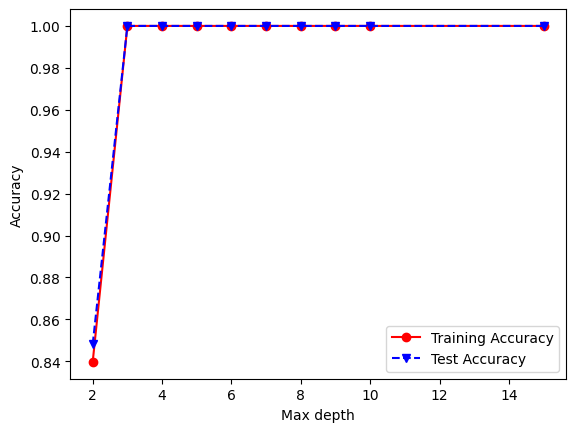

In [9]:
plt.plot(max_depths,train_acc,'ro-',max_depths,test_acc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

From the plot generated above, the optimal elbow depth is around 4, where training and test accuracies converges as a 1.0 accuracy. The Optimal Decision Tree Classifier will be trained using this depth, and saved for further use. 

In [10]:
# Train and fit the Decision Tree model using x and y training sets
decision_tree_model = DecisionTreeClassifier(max_depth=4)
decision_tree_model = decision_tree_model.fit(x_train, y_train)
# Get results of model
y_pred_train = decision_tree_model.predict(x_train)
y_pred_test = decision_tree_model.predict(x_test)
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)

# Ensure the 'trained_models' directory exists
os.makedirs('trained_models', exist_ok=True)
# Save the trained model to a file
joblib.dump(decision_tree_model, '../trained_models/decision_tree_model.pkl')

Training Accuracy:  1.0
Testing Accuracy:  1.0


['../trained_models/decision_tree_model.pkl']